In [1]:
library('readr')
library('reshape2')
library('ggplot2')
library('rgdal')
library('ggmap')

# Get statistics functions
source('common_stats_functions.r')
# Load a list of stations with coordinates and 
# ummary statistics
calcs <- get_locCalcs_and_stats()

Loading required package: sp
rgdal: version: 1.4-7, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.3, released 2019/10/28
 Path to GDAL shared files: /usr/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 6.2.1, November 1st, 2019, [PJ_VERSION: 620]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.3-1 
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/data/GD_gregmaurer/droughtnet_precipsens_data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields


Regions defined for each Polygons


[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/USHCN_derived/allyr_ushcn_calcs_allstations.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character(),
  elev = col_character(),
  state = col_character(),
  name = col_character(),
  flag1 = col_character(),
  flag2 = col_character(),
  flag3 = col_character()
)
See spec(...) for full column specifications.


[1] "1218 USHCN sites total"
[1] "Maximum percent of record missing (all stations) = 15.2551878855861"
[1] "Maximum years of data missing (all stations) = 22.6666666666667"
[1] "Minimum number of years in record (all stations) = 106.25"
[1] "0 sites have 12mo SPEI trends assigned NA"
[1] "252 non-significant 12mo SPEI trends (alpha=0.05)"
[1] "475 non-significant 12mo SPEI trends (alpha=0.05,Bonferroni corrected)"
[1] "0 sites have 12mo SPEI CV trends assigned NA"
[1] "148 non-significant 12mo SPEI CV trends (alpha=0.05)"
[1] "345 non-significant 12mo SPEI CV trends (alpha=0.05,Bonferroni corrected)"


In [2]:
# Get sensitivities (use dn_path from common_stats_functions)
fname <- paste0(dn_path, 'sensitivity_analysis/randomStation_summedeffects_MODIS.csv')

sens <- read_csv(fname)
dim(sens)
head(sens)

# Merge together calcs and sensitivities
df <- merge(sens, calcs, by='stationid')

dim(df)
head(df)

Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character(),
  neonDomainName = col_character()
)
See spec(...) for full column specifications.


[1] 1208   44

stationid,neonDomainName,MAP,MAT,spei12mo_trend,spei12mo_cv5yr_trend,evi_prcp_randomIntcpt,evi_prcp_randomSlope,evi_prcp_yval_range,evi_prcp_rmse_raw,⋯,zgpp_spei_rmse_ub,zgpp_spei_nrmse_ub,MAPdom,MATdom,spei12mo_trend_all.x,spei12mo_cv5yr_trend_all.x,MAPsta,MATsta,spei12mo_trend_all.y,spei12mo_cv5yr_trend_all.y
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USH00011084,Southeast,1569.225,19.65286,4.948660e-04,-5.418599e-05,0.7890059,0.0002120668,0.7343424,0.2217927,⋯,1.583420,0.2796107,1368.262,19.40080,3.097272e-05,2.635474e-05,1573.777,19.79029,4.948660e-04,-5.418599e-05
USH00012813,Southeast,1690.481,19.48766,2.871429e-04,1.828267e-05,0.8316867,0.0002634271,0.5606316,0.1529761,⋯,1.185395,0.2998584,1368.262,19.40080,3.097272e-05,2.635474e-05,1648.008,19.23061,2.871429e-04,1.828267e-05
USH00013160,Ozarks Complex,1351.556,17.92505,2.030824e-04,-2.064144e-05,0.5040932,0.0000540894,0.6112931,0.1731744,⋯,1.422920,0.2659763,1241.816,16.02792,3.291694e-04,-2.051841e-05,1386.659,17.73815,2.030824e-04,-2.064144e-05
USH00013511,Ozarks Complex,1193.169,17.51344,-5.681463e-06,-1.147154e-05,0.9891229,0.0002038751,0.6153652,0.2059843,⋯,2.183155,0.2836819,1241.816,16.02792,3.291694e-04,-2.051841e-05,1322.446,16.96937,-5.681463e-06,-1.147154e-05
USH00013816,Southeast,1354.350,16.84411,3.157518e-04,-3.465651e-06,1.4768161,-0.0000241440,0.5921338,0.1891790,⋯,1.547479,0.2193108,1368.262,19.40080,3.097272e-05,2.635474e-05,1357.113,16.82745,3.157518e-04,-3.465651e-06
USH00015749,Ozarks Complex,1291.244,16.71458,4.272818e-04,1.449213e-06,-0.6677916,0.0003716946,1.3736412,0.3494436,⋯,1.165238,0.2654173,1241.816,16.02792,3.291694e-04,-2.051841e-05,1263.635,16.07114,4.272818e-04,1.449213e-06


[1] 1208   71

stationid,neonDomainName,MAP,MAT,spei12mo_trend.x,spei12mo_cv5yr_trend.x,evi_prcp_randomIntcpt,evi_prcp_randomSlope,evi_prcp_yval_range,evi_prcp_rmse_raw,⋯,prcp_cv5yr_trend,prcp_cv5yr_trend_sig,spei12mo_trend.y,spei12mo_trend_sig,spei12mo_cv5yr_trend.y,spei12mo_cv5yr_trend_sig,spi12mo_trend,spi12mo_trend_sig,spi12mo_cv5yr_trend,spi12mo_cv5yr_trend_sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USH00011084,Southeast,1569.225,19.65286,4.948660e-04,-5.418599e-05,0.7890059,0.0002120668,0.7343424,0.2217927,⋯,-3.082635e-06,5.181877e-01,4.948660e-04,4.281059e-17,-5.418599e-05,1.450005e-23,3.475070e-04,4.515042e-09,-2.761315e-05,1.117645e-08
USH00012813,Southeast,1690.481,19.48766,2.871429e-04,1.828267e-05,0.8316867,0.0002634271,0.5606316,0.1529761,⋯,5.832594e-05,1.395250e-27,2.871429e-04,1.332174e-06,1.828267e-05,7.089053e-04,3.154710e-04,1.066194e-07,1.294170e-05,1.344355e-02
USH00013160,Ozarks Complex,1351.556,17.92505,2.030824e-04,-2.064144e-05,0.5040932,0.0000540894,0.6112931,0.1731744,⋯,-1.006481e-04,1.951328e-83,2.030824e-04,6.633134e-04,-2.064144e-05,8.391407e-05,2.282740e-04,1.295231e-04,-3.163045e-05,8.261308e-10
USH00013511,Ozarks Complex,1193.169,17.51344,-5.681463e-06,-1.147154e-05,0.9891229,0.0002038751,0.6153652,0.2059843,⋯,-4.603313e-05,1.517411e-34,-5.681463e-06,9.233457e-01,-1.147154e-05,5.703395e-02,8.473712e-05,1.509880e-01,-2.727170e-05,4.638926e-06
USH00013816,Southeast,1354.350,16.84411,3.157518e-04,-3.465651e-06,1.4768161,-0.0000241440,0.5921338,0.1891790,⋯,-4.880355e-05,4.188936e-25,3.157518e-04,1.032076e-07,-3.465651e-06,5.319998e-01,1.730071e-04,3.667829e-03,1.637979e-05,3.540241e-03
USH00015749,Ozarks Complex,1291.244,16.71458,4.272818e-04,1.449213e-06,-0.6677916,0.0003716946,1.3736412,0.3494436,⋯,-1.990534e-05,5.019340e-05,4.272818e-04,1.014964e-12,1.449213e-06,8.349459e-01,5.983068e-04,7.816069e-24,-4.647953e-05,5.760756e-15


## Sensitivity maps

Source : http://tile.stamen.com/terrain/4/2/5.png
Source : http://tile.stamen.com/terrain/4/3/5.png
Source : http://tile.stamen.com/terrain/4/4/5.png
Source : http://tile.stamen.com/terrain/4/5/5.png
Source : http://tile.stamen.com/terrain/4/2/6.png
Source : http://tile.stamen.com/terrain/4/3/6.png
Source : http://tile.stamen.com/terrain/4/4/6.png
Source : http://tile.stamen.com/terrain/4/5/6.png


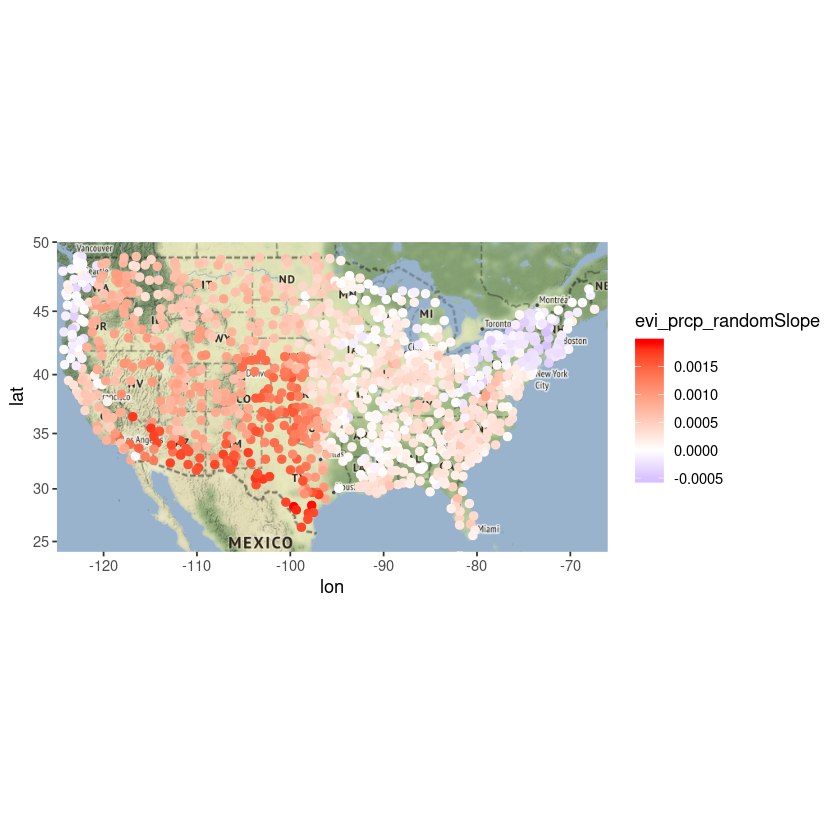

In [3]:
# GPP:prcp
# Google maps now requires an API key goddammnit, and the OSM geocoder sucks
# just make a bounding box
library('tmaptools') # using a new geocoder (geocode_OSM) since google now requires api key
na <- get_map(c(-125, 24, -66, 50), zoom=4, source='stamen')
#na <- get_map(rbind(as.numeric(paste(geocode_OSM("Lincoln, Nebraska")$bbox))), zoom=6)
namap <- ggmap(na)
namap + geom_point(aes(x=longitude,y=latitude,col=evi_prcp_randomSlope), size=2,data=df) +
        scale_colour_gradient2(low='blue', high='red')

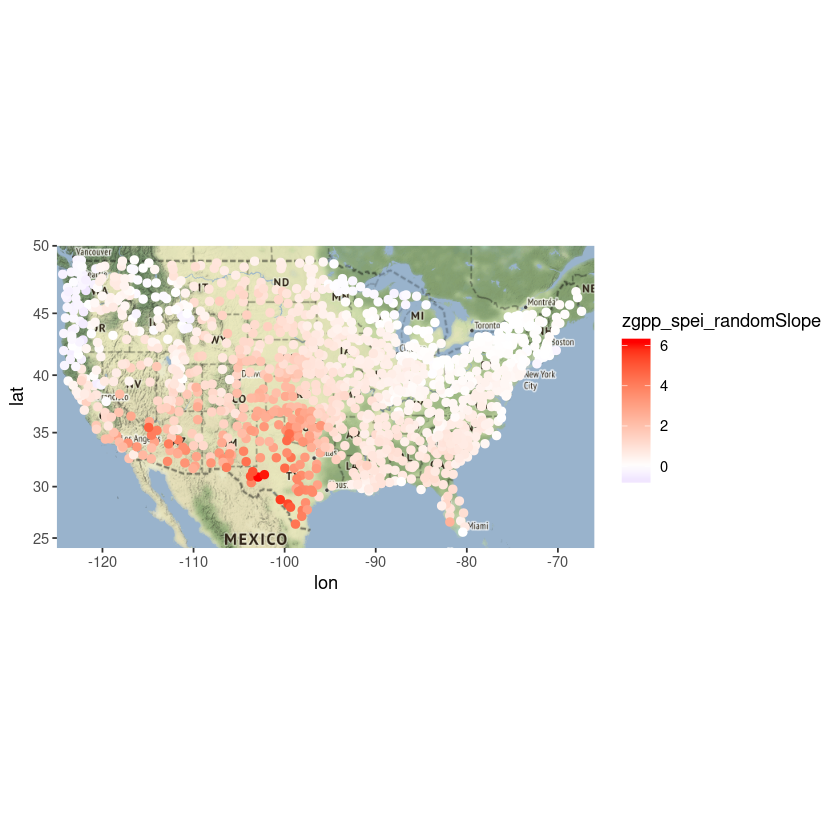

In [4]:
# zgpp:spei
namap + geom_point(aes(x=longitude,y=latitude,col=zgpp_spei_randomSlope), size=2,data=df) +
        scale_colour_gradient2(low='blue', high='red')

# Red = increasing sensitivity, Blue = decreasing

## Look at RMSE

In [5]:
# Remove really high RMSE values
sum(df$gpp_prcp_nrmse_ub>0.5)
df$gpp_prcp_nrmse_ub[df$gpp_prcp_nrmse_ub>0.5] <- NA
sum(df$npp_prcp_nrmse_ub>0.5)
df$npp_prcp_nrmse_ub[df$npp_prcp_nrmse_ub>0.5] <- NA
sum(df$evi_prcp_nrmse_ub>0.5)
df$evi_prcp_nrmse_ub[df$evi_prcp_nrmse_ub>0.5] <- NA

[1] 2

[1] 4

[1] 1

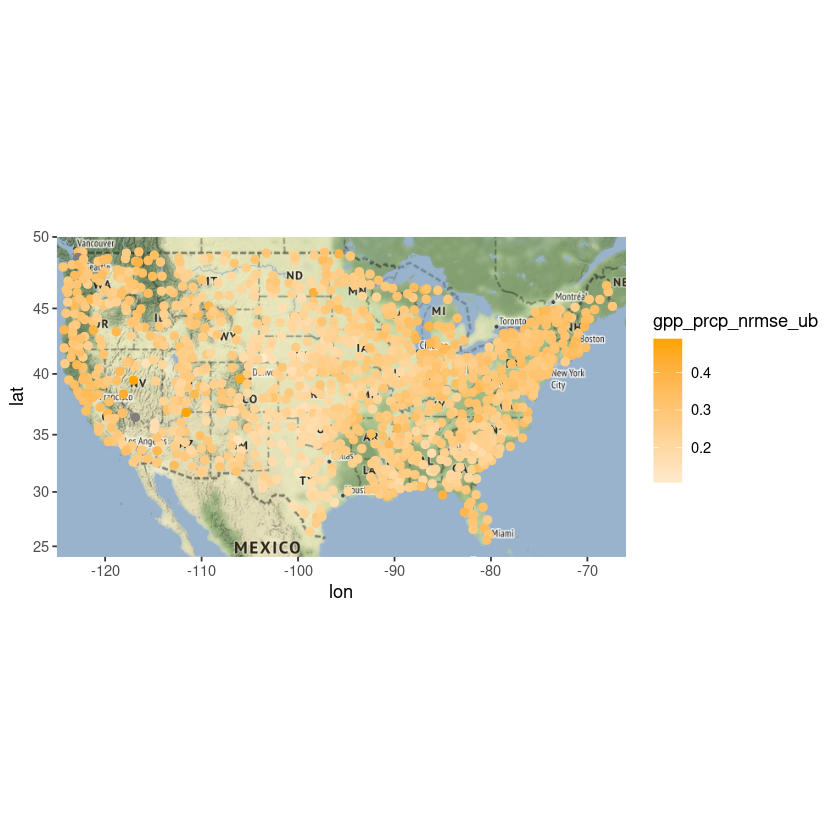

In [6]:
# There are about 5 different residuals calculated
namap + geom_point(aes(x=longitude,y=latitude,col=gpp_prcp_nrmse_ub), size=2,data=df) +
        scale_colour_gradient2(low='white', high='orange')


In [7]:
# Interpolate the sensitivity values using krige_area
interp_EviPrcp_sens <- krige_area(df[!is.na(df$evi_prcp_randomSlope),],
                                  'evi_prcp_randomSlope', 'latitude', 'longitude',
                                  map_base_data=map_data('usa'))
interp_GppPrcp_sens <- krige_area(df[!is.na(df$gpp_prcp_randomSlope),],
                                  'gpp_prcp_randomSlope', 'latitude', 'longitude',
                                  map_base_data=map_data('usa'))
#interp_zGppSpei_sens <- krige_area(df[!is.na(df$zgpp_spei_randomSlope),], 'zgpp_spei_randomSlope', 'latitude', 'longitude', map_base_data=map_data('usa'))
interp_NppPrcp_sens <- krige_area(df[!is.na(df$npp_prcp_randomSlope),],
                                  'npp_prcp_randomSlope', 'latitude', 'longitude',
                                  map_base_data=map_data('usa'))


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following objects are masked from ‘package:reshape2’:

    dcast, melt

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



[1] "long island"
[1] "lopez island"
[1] "main"
[1] "manhattan"
[1] "martha's vineyard"
[1] "nantucket island"
[1] "orcas island"
[1] "san juan island"
[1] "staten island"
[1] "whidbey island"
[using ordinary kriging]
[1] "long island"
[1] "lopez island"
[1] "main"
[1] "manhattan"
[1] "martha's vineyard"
[1] "nantucket island"
[1] "orcas island"
[1] "san juan island"
[1] "staten island"
[1] "whidbey island"
[using ordinary kriging]
[1] "long island"
[1] "lopez island"
[1] "main"
[1] "manhattan"
[1] "martha's vineyard"
[1] "nantucket island"
[1] "orcas island"
[1] "san juan island"
[1] "staten island"
[1] "whidbey island"
[using ordinary kriging]


Warning message:
“Length of logical index must be 1 or 1218, not 1208”

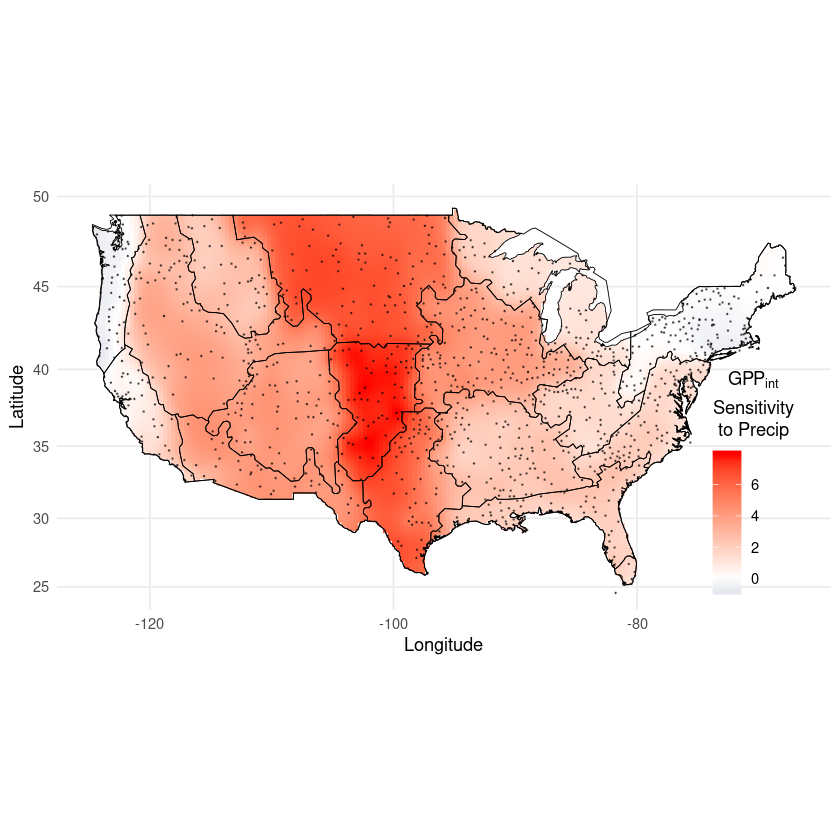

In [8]:
gpp_prcp_sens <- plot_interp(interp_GppPrcp_sens, 'gpp_prcp_randomSlope_pred',
                   expression(atop('GPP'['int'], atop(displaystyle("Sensitivity"), displaystyle("to Precip")))),
                   calcs[!is.na(df$gpp_prcp_randomSlope),], plot_contours=F)
gpp_prcp_sens
# States instead of ecoregions (2 versions)

In [9]:
ggsave('../figs/conusDom_GPPprcp_sens.eps')
ggsave('../figs/conusDom_GPPprcp_sens.png', dpi=600)
#ggsave('../figs/conusDom_spei_trend.svg')

Saving 6.67 x 6.67 in image
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”Saving 6.67 x 6.67 in image


In [10]:
zgpp_spei_sens <- plot_interp(interp_zGppSpei_sens, 'zgpp_spei_randomSlope_pred',
                   expression(atop('zGPP'['int'], atop(displaystyle("Sensitivity"), displaystyle("to Aridity")))),
                   calcs[!is.na(df$zgpp_spei_randomSlope),], plot_contours=F)
zgpp_spei_sens

ERROR: Error in ggplot(data = df_interp, aes(x = longitude, y = latitude)): object 'interp_zGppSpei_sens' not found


In [ ]:
ggsave('../figs/conusDom_zGPPspei_sens.pdf')
ggsave('../figs/conusDom_zGPPspei_sens.png', dpi=600)
#ggsave('../figs/conusDom_speiCV_trend_RedisBad.svg')

Warning message:
“Length of logical index must be 1 or 1218, not 1208”

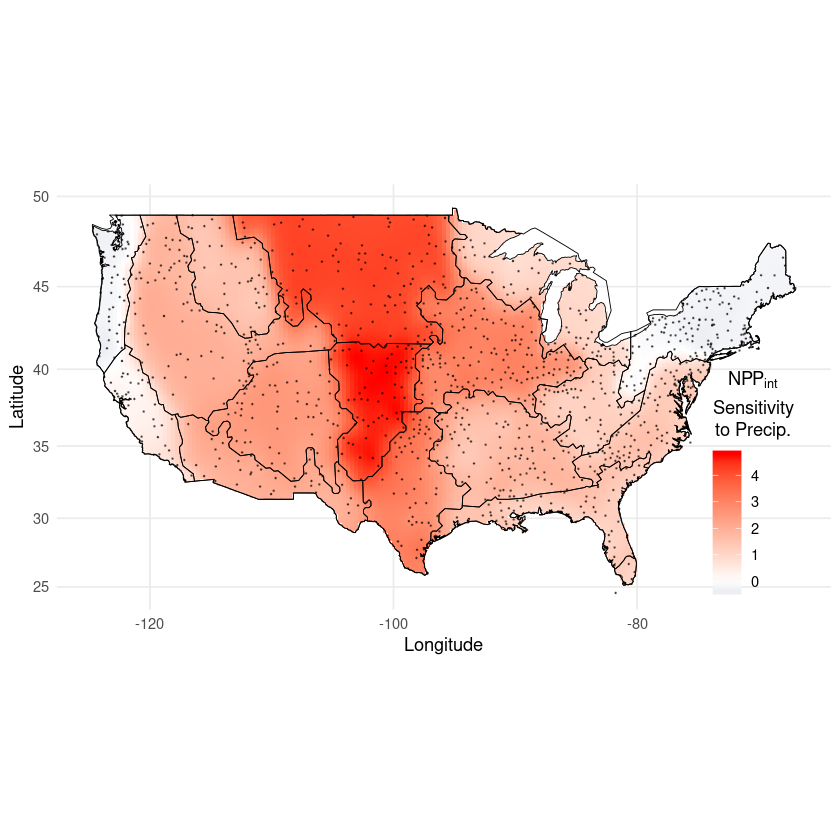

In [11]:
npp_prcp_sens <- plot_interp(interp_NppPrcp_sens, 'npp_prcp_randomSlope_pred',
                   expression(atop('NPP'['int'], atop(displaystyle("Sensitivity"), displaystyle("to Precip.")))),
                   calcs[!is.na(df$npp_prcp_randomSlope),], plot_contours=F)
npp_prcp_sens

In [12]:
ggsave('../figs/conusDom_NPPprcp_sens.pdf')
ggsave('../figs/conusDom_NPPprcp_sens.png', dpi=600)
#ggsave('../figs/conusDom_spei_trend.svg')

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


Warning message:
“Length of logical index must be 1 or 1218, not 1208”

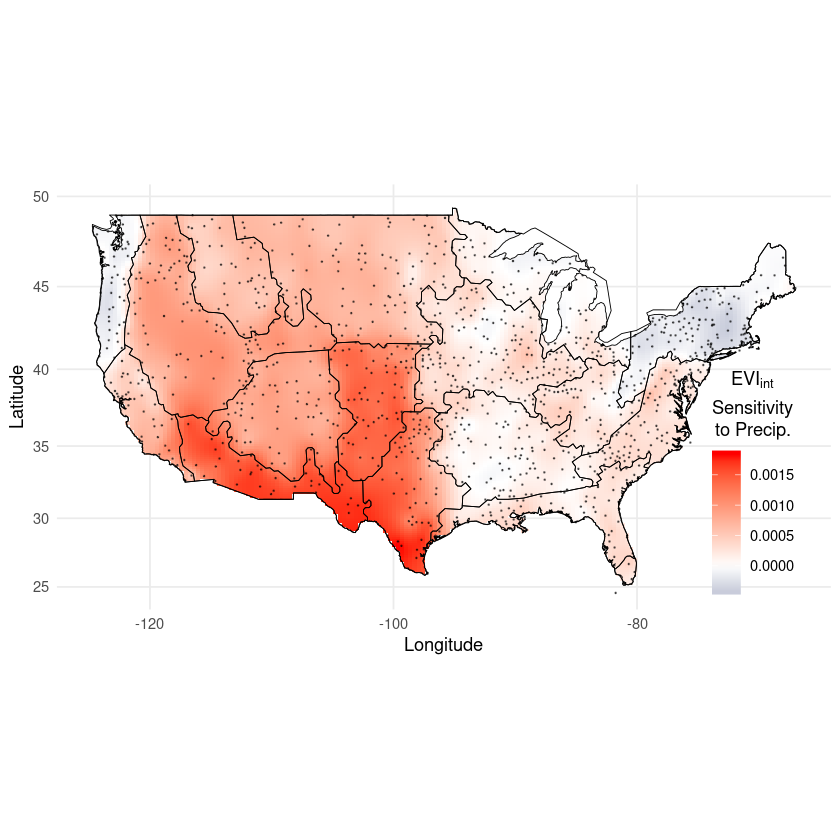

In [13]:
evi_prcp_sens <- plot_interp(interp_EviPrcp_sens, 'evi_prcp_randomSlope_pred',
                   expression(atop('EVI'['int'], atop(displaystyle("Sensitivity"), displaystyle("to Precip.")))),
                   calcs[!is.na(df$evi_prcp_randomSlope),], plot_contours=F)
evi_prcp_sens

In [14]:
ggsave('../figs/conusDom_EVIprcp_sens.pdf')
ggsave('../figs/conusDom_EVIprcp_sens.png', dpi=600)
#ggsave('../figs/conusDom_spei_trend.svg')

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


## Model fit maps

In [15]:
interp_GppPrcp_nrmse <- krige_area(df[!is.na(df$gpp_prcp_nrmse_ub),], 'gpp_prcp_nrmse_ub', 'latitude', 'longitude', map_base_data=map_data('usa'))
interp_EviPrcp_nrmse <- krige_area(df[!is.na(df$evi_prcp_nrmse_ub),], 'evi_prcp_nrmse_ub', 'latitude', 'longitude', map_base_data=map_data('usa'))
interp_NppPrcp_nrmse <- krige_area(df[!is.na(df$npp_prcp_nrmse_ub),], 'npp_prcp_nrmse_ub', 'latitude', 'longitude', map_base_data=map_data('usa'))

[1] "long island"
[1] "lopez island"
[1] "main"
[1] "manhattan"
[1] "martha's vineyard"
[1] "nantucket island"
[1] "orcas island"
[1] "san juan island"
[1] "staten island"
[1] "whidbey island"
[using ordinary kriging]
[1] "long island"
[1] "lopez island"
[1] "main"
[1] "manhattan"
[1] "martha's vineyard"
[1] "nantucket island"
[1] "orcas island"
[1] "san juan island"
[1] "staten island"
[1] "whidbey island"
[using ordinary kriging]
[1] "long island"
[1] "lopez island"
[1] "main"
[1] "manhattan"
[1] "martha's vineyard"
[1] "nantucket island"
[1] "orcas island"
[1] "san juan island"
[1] "staten island"
[1] "whidbey island"
[using ordinary kriging]


In [16]:
colnames(interp_GppPrcp_nrmse)

[1] "latitude"                "longitude"              
[3] "gpp_prcp_nrmse_ub_pred"  "gpp_prcp_nrmse_ub_var"  
[5] "gpp_prcp_nrmse_ub_stdev"

Warning message:
“Length of logical index must be 1 or 1218, not 1208”

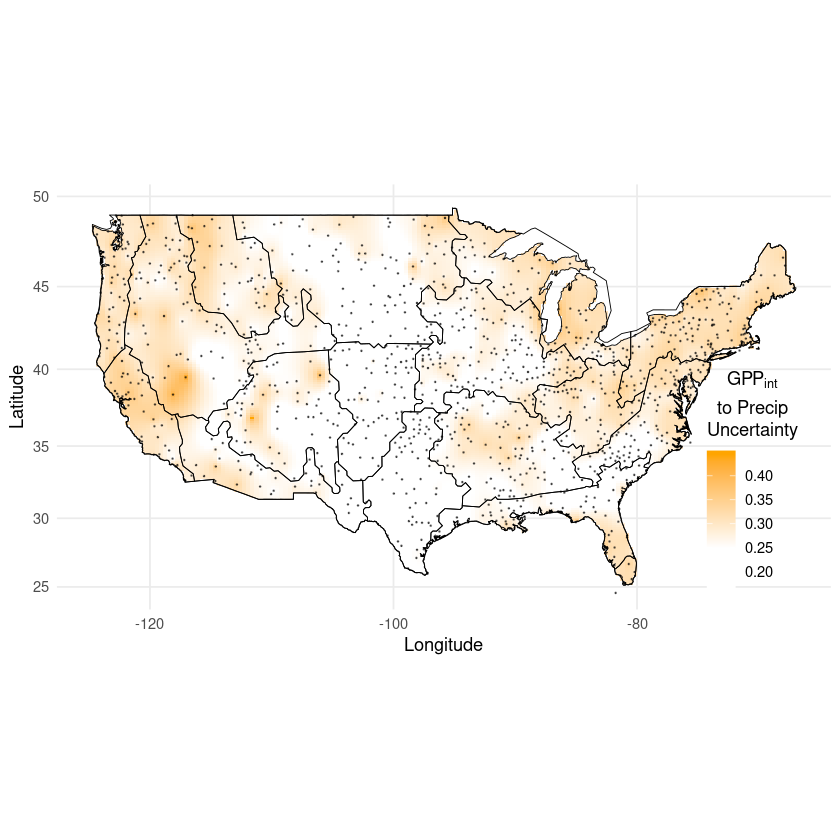

In [17]:
gpp_prcp_nrmse <- plot_interp(interp_GppPrcp_nrmse, 'gpp_prcp_nrmse_ub_pred',
                              expression(atop('GPP'['int'], atop(displaystyle("to Precip"), displaystyle("Uncertainty")))),
                              calcs[!is.na(df$npp_prcp_nrmse_ub),], plot_contours=F,
                             lowCol='white',midCol='white',highCol='orange', midpt=0.25)
gpp_prcp_nrmse

In [18]:
ggsave('../figs/conusDom_GPPprcp_nrmse.pdf')
ggsave('../figs/conusDom_GPPprcp_nrmse.png', dpi=600)
#ggsave('../figs/conusDom_spei_trend.svg')

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


Warning message:
“Length of logical index must be 1 or 1218, not 1208”

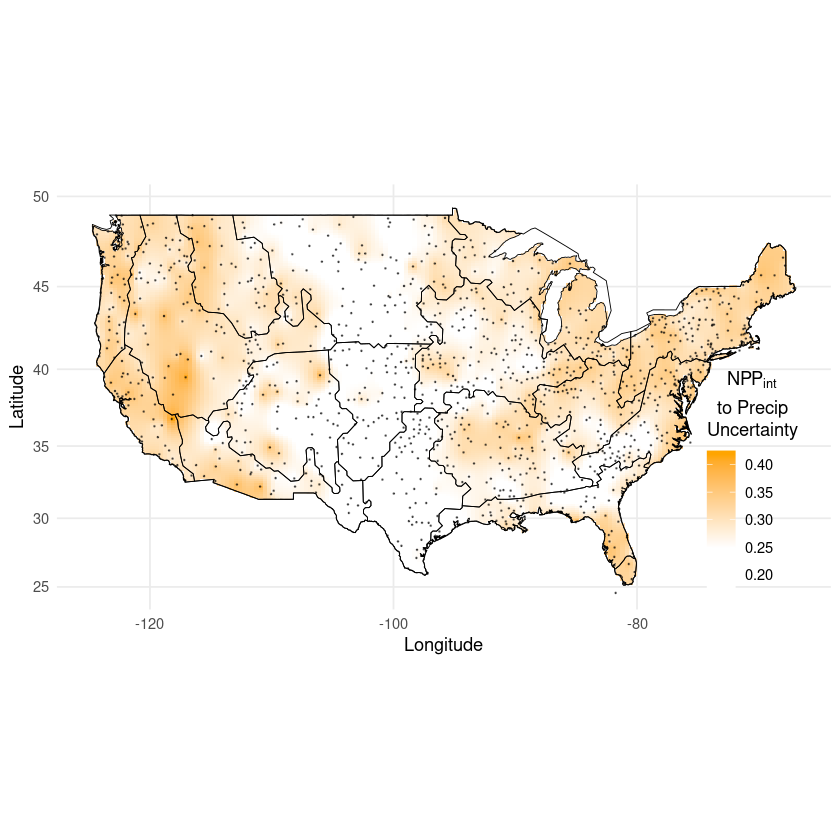

In [19]:
npp_prcp_nrmse <- plot_interp(interp_NppPrcp_nrmse, 'npp_prcp_nrmse_ub_pred',
                              expression(atop('NPP'['int'], atop(displaystyle("to Precip"), displaystyle("Uncertainty")))),
                              calcs[!is.na(df$npp_prcp_nrmse_ub),], plot_contours=F,
                             lowCol='white',midCol='white',highCol='orange', midpt=0.25)
npp_prcp_nrmse

In [20]:
ggsave('../figs/conusDom_NPPprcp_nrmse.pdf')
ggsave('../figs/conusDom_NPPprcp_nrmse.png', dpi=600)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


Warning message:
“Length of logical index must be 1 or 1218, not 1208”

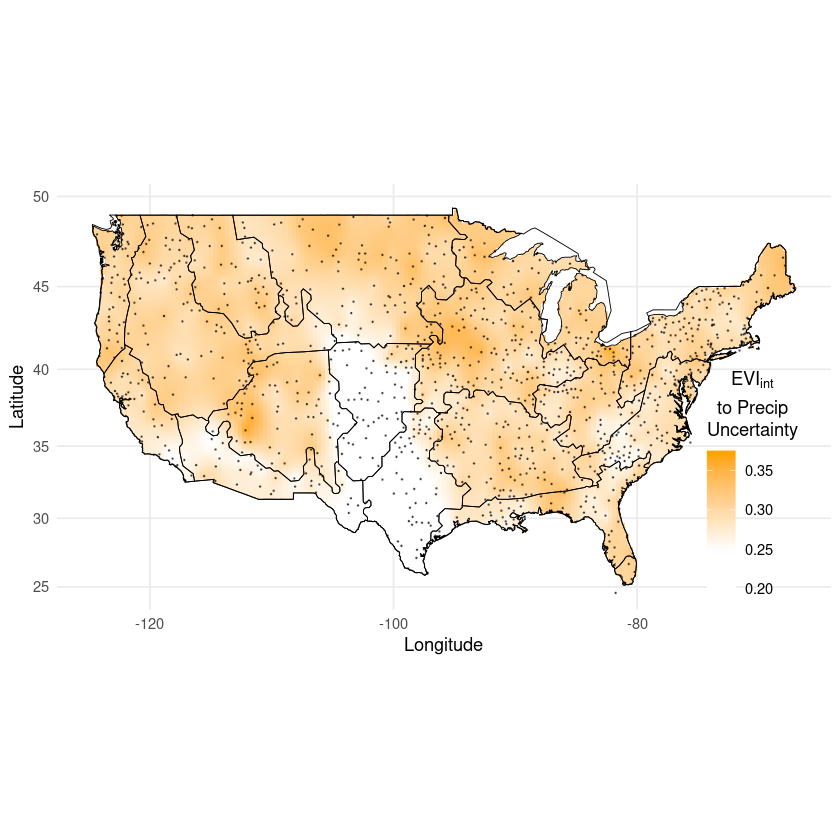

In [21]:
evi_prcp_nrmse <- plot_interp(interp_EviPrcp_nrmse, 'evi_prcp_nrmse_ub_pred',
                              expression(atop('EVI'['int'], atop(displaystyle("to Precip"), displaystyle("Uncertainty")))),
                              calcs[!is.na(df$evi_prcp_nrmse_ub),], plot_contours=F,
                             lowCol='white',midCol='white',highCol='orange', midpt=0.25)
evi_prcp_nrmse

In [22]:
ggsave('../figs/conusDom_EVIprcp_nrmse.pdf')
ggsave('../figs/conusDom_EVIprcp_nrmse.png', dpi=600)
#ggsave('../figs/conusDom_spei_trend.svg')

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [23]:
library('cowplot', 'repr')
figA = evi_prcp_sens +
  labs(fill=expression('EVI'['int'])) +
  theme(
      axis.text.x=element_blank(),
      axis.title.x=element_blank(),
      legend.position = c(0.935, 0.28),
      legend.key.size=unit(4, 'mm'),
      legend.text=element_text(size=8),
      legend.title=element_text(size=10))# +
      #panel_border(remove=TRUE)

figB = npp_prcp_sens +
  labs(fill=expression('NPP'['int'])) +
  theme(
      axis.text.x=element_blank(),
      axis.title.x=element_blank(),
      legend.position = c(0.915, 0.28),
      legend.key.size=unit(4, 'mm'),
      legend.text=element_text(size=8),
      legend.title=element_text(size=10))# +
      #panel_border(remove=TRUE)

figC = gpp_prcp_sens +
  labs(fill=expression('GPP'['int'])) +
  theme(
      #axis.text.x=element_blank(),
      #axis.title.x=element_blank(),
      #axis.title.y=element_blank(),
      legend.position = c(0.915, 0.28),
      legend.key.size=unit(4, 'mm'),
      legend.text=element_text(size=8),
      legend.title=element_text(size=10))# +
      #panel_border(remove=TRUE)

figD = evi_prcp_nrmse +
  labs(fill='NRMSE') +
  theme(
      axis.text.x=element_blank(),
      axis.title.x=element_blank(),
      axis.text.y=element_blank(),
      axis.title.y=element_blank(),
      legend.position = c(0.915, 0.28),
      legend.key.size=unit(4, 'mm'),
      legend.text=element_text(size=8),
      legend.title=element_text(size=10))# +
      #panel_border(remove=TRUE)

figE = npp_prcp_nrmse +
  labs(fill='NRMSE') +
  theme(
      axis.text.x=element_blank(),
      axis.title.x=element_blank(),
      axis.text.y=element_blank(),
      axis.title.y=element_blank(),
      legend.position = c(0.915, 0.28),
      legend.key.size=unit(4, 'mm'),
      legend.text=element_text(size=8),
      legend.title=element_text(size=10))# +
      #panel_border(remove=TRUE)

figF = gpp_prcp_nrmse +
  labs(fill='NRMSE') +
  theme(
      #axis.text.x=element_blank(),
      #axis.title.x=element_blank(),
      axis.text.y=element_blank(),
      axis.title.y=element_blank(),
      legend.position = c(0.915, 0.28),
      legend.key.size=unit(4, 'mm'),
      legend.text=element_text(size=8),
      legend.title=element_text(size=10))# +
      #panel_border(remove=TRUE)



********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggmap’:

    theme_nothing



In [24]:
options(repr.plot.width=7.5, repr.plot.height=8)
figX = plot_grid(figA, figD, figB, figE, figC, figF,labels = c("A", "D", "B", "E", "C", "F"), ncol = 2, align='hv')

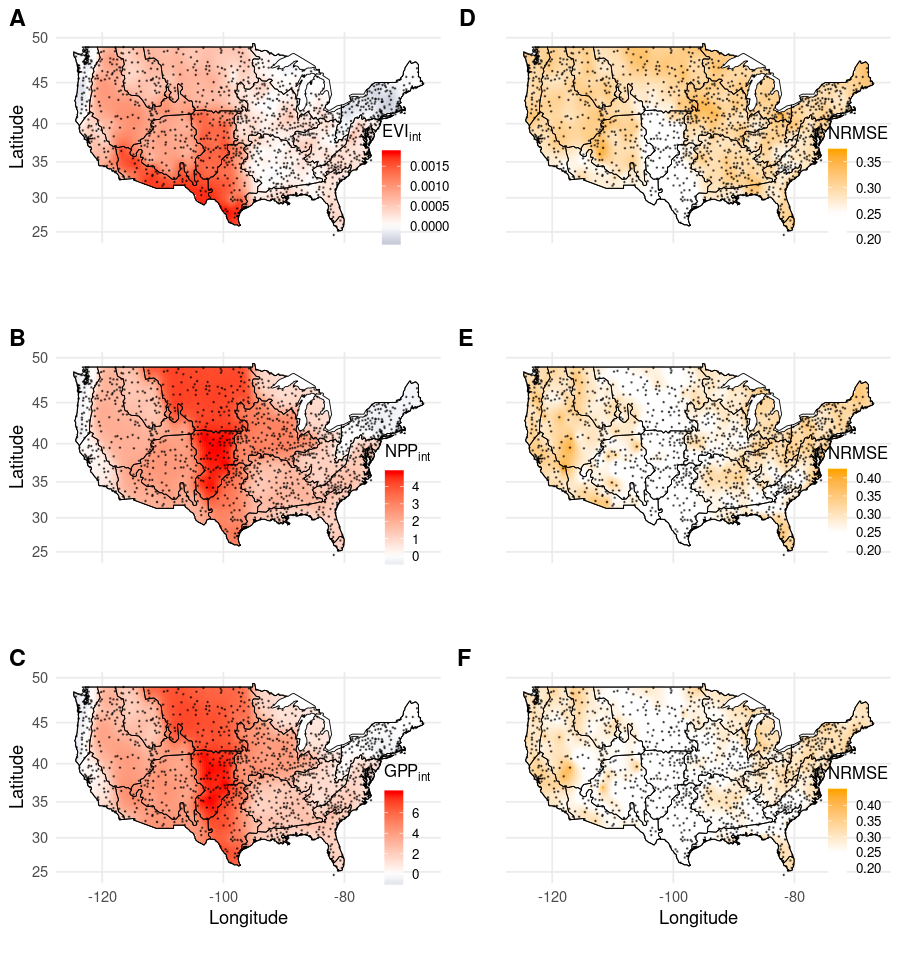

In [25]:
figX

In [26]:
ggsave('../figs/conusDom_MODIS.pdf', width=7.5, height=8, dpi=600)
ggsave('../figs/conusDom_MODIS.png', width=7.5, height=8, dpi=600)